In [1]:
# Set directory
ROOT_DIR = abspath(joinpath(pwd(),"../"))

# Activate environment
ENV["GKSwstype"] = "100"
import Pkg
Pkg.activate(ROOT_DIR)

# Include libraries
using AGNI


  Activating project at `/dataserver/users/formingworlds/nicholls/AGNI`


In [2]:
using Plots
using Printf

In [3]:
ideal_H2O::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2O", true, false)
println(ideal_H2O.eos)

phys.ENABLE_AQUA = false
vdw_H2O::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2O", true, true)
println(vdw_H2O.eos)

phys.ENABLE_AQUA = true
aqua_H2O::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2O", true, true)
println(aqua_H2O.eos)

EOS_IDEAL
EOS_VDW
EOS_AQUA


In [4]:
ideal_H2::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2", true, false)
println(ideal_H2.eos)

phys.ENABLE_CMS19 = false
vdw_H2::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2", true, true)
println(vdw_H2.eos)

phys.ENABLE_CMS19 = true
cms19_H2::phys.Gas_t = phys.load_gas("$ROOT_DIR/res/thermodynamics/", "H2", true, true)
println(cms19_H2.eos)

EOS_IDEAL
EOS_VDW
EOS_CMS19


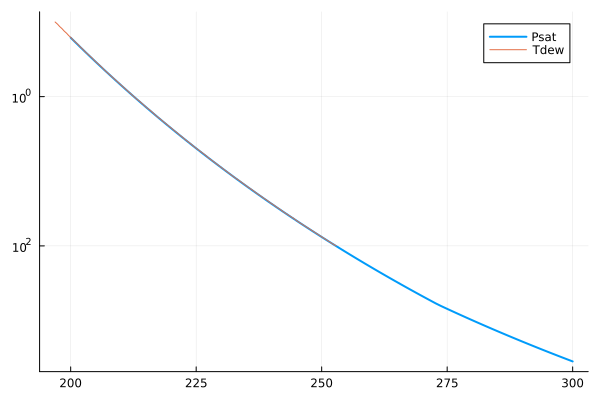

In [18]:

fig = plot(yscale=:log10, yflip=true)

# eval Psat
t_eval = range(start=200.0, stop=300.0, length=100)
p_sat = zeros(Float64, length(t_eval))
for i in 1:length(t_eval)
    p_sat[i] = phys.get_Psat(ideal_H2O, t_eval[i])
end
plot!(fig, t_eval, p_sat, label="Psat", lw=2)

# eval Tdew
p_eval = 10.0 .^ range(start=-1, stop=2, length=100)
t_dew = zeros(Float64, length(p_eval))
for i in 1:length(t_eval)
    t_dew[i] = phys.get_Tdew(ideal_H2O, p_eval[i])
end
plot!(fig, t_dew, p_eval, label="Tdew")

display(fig)

In [6]:
t_test = [200.0,  300.0, 500.0,   1273.0,  3200.0] # Tested values of temperature [K]
p_test = [1e0,    1e3,   1e5,     1e7,     1e8]    # Tested values of pressure [Pa]
psamp  = length(p_test)
for i in 1:psamp
    i_obs = phys.calc_rho_gas(t_test[i], p_test[i], ideal_H2O)
    a_obs = phys.calc_rho_gas(t_test[i], p_test[i], aqua_H2O)

    @printf("%6.1f K, %.2e Pa  ->   %.2e  |  %.2e  kg/m^3 \n",t_test[i], p_test[i], i_obs, a_obs)
end

 200.0 K, 1.00e+00 Pa  ->   1.08e-05  |  9.26e+02  kg/m^3 
 300.0 K, 1.00e+03 Pa  ->   7.22e-03  |  7.23e-03  kg/m^3 
 500.0 K, 1.00e+05 Pa  ->   4.33e-01  |  4.35e-01  kg/m^3 
1273.0 K, 1.00e+07 Pa  ->   1.70e+01  |  1.70e+01  kg/m^3 
3200.0 K, 1.00e+08 Pa  ->   6.77e+01  |  6.69e+01  kg/m^3 


In [7]:
p_test = 10.0 .^ range(4.0, -2.0, length=7)    # Tested values of pressure [bar]
psamp  = length(p_test)

t_test = range(100.0, 3500.0, length=100)
tsamp = length(t_test)

cmap = :eastern_rosella

:eastern_rosella

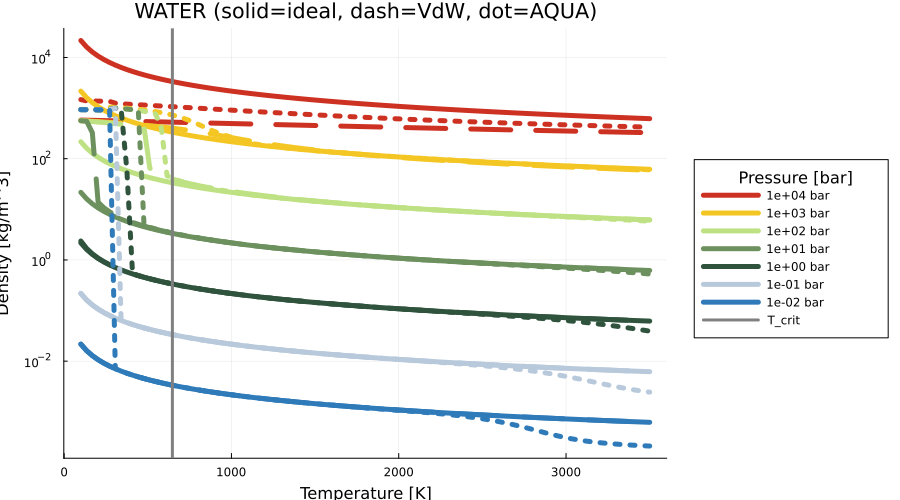

In [8]:
fig = plot(yscale=:log10, ylabel="Density [kg/m^3]", xlabel="Temperature [K]",
            legendtitle="Pressure [bar]", legend=:outerright,
            size=(900,500), title="WATER (solid=ideal, dash=VdW, dot=AQUA)")

p = Plots.palette(cmap, psamp)

lw=5

# for each pressure...
for i in 1:psamp
    col = p[i]
    lbl = @sprintf("%.0e bar",p_test[i])

    # ideal gas
    rho = zeros(Float64, tsamp)
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], ideal_H2O)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, label=lbl)

    # vdw
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], vdw_H2O)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, ls=:dash, label="")

    # aqua
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], aqua_H2O)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, ls=:dot, label="")
end

# critical temp
vline!(fig, [aqua_H2O.T_crit], label="T_crit", lc=:grey, lw=3)

display(fig)

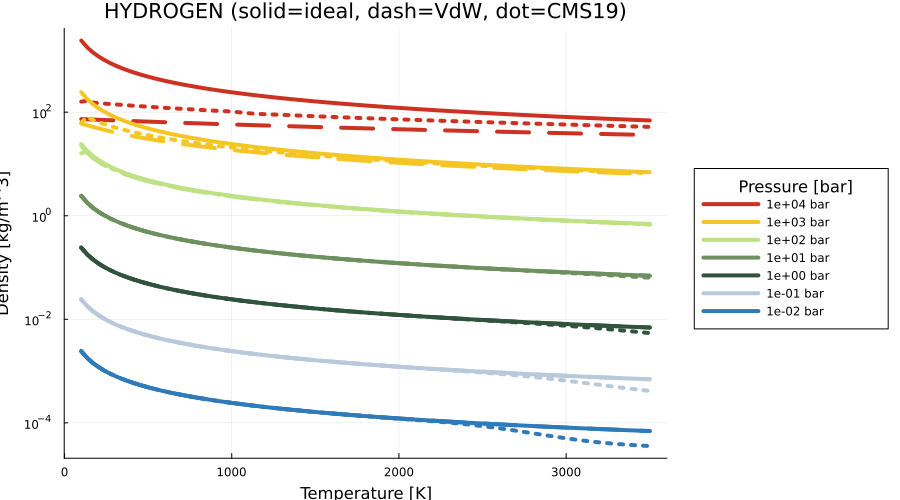

In [9]:
fig = plot(yscale=:log10, ylabel="Density [kg/m^3]", xlabel="Temperature [K]",
            legendtitle="Pressure [bar]", legend=:outerright,
            size=(900,500), title="HYDROGEN (solid=ideal, dash=VdW, dot=CMS19)")

p = Plots.palette(cmap, psamp)

lw=4

# for each pressure...
for i in 1:psamp
    col = p[i]
    lbl = @sprintf("%.0e bar",p_test[i])

    # ideal gas
    rho = zeros(Float64, tsamp)
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], ideal_H2)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, label=lbl)

    # vdw
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], vdw_H2)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, ls=:dash, label="")

    # cms19
    for j in 1:tsamp
        rho[j] = phys.calc_rho_gas(t_test[j], 1e5*p_test[i], cms19_H2)
    end
    plot!(fig, t_test, rho, lw=lw, lc=col, ls=:dot, label="")


end

display(fig)